Customer churn refers to the phenomenon where customers cease their relationship with a business or service, typically by discontinuing the use of its products or services. It is a crucial metric for businesses as it measures the rate at which customers leave or "churn out." High churn rates can signify issues such as dissatisfaction, competition, or changing customer needs. Reducing customer churn is often a strategic goal for companies, as retaining existing customers is generally more cost-effective than acquiring new ones. Analyzing the reasons behind customer churn and implementing strategies to improve customer satisfaction and loyalty are essential for sustaining a healthy and successful business.In this notebook, I will show you how to build a customer churn prediction model in Python using the random forests algorithm.

In [1]:
#Importing Libraries
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Getting Data

In [2]:
#Importing data
data = pd.read_csv("datasets/telco_customer_churn.csv")

### Step 2: Reviewing the Dataset

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Step 3: Data Preprocessing

In [6]:
#changing column names to lower case
data.columns = data.columns.str.lower()

The column "TotalCharges" is of type object, which suggests it might contain non-numeric values. We need to convert it to a numeric data type (e.g., float64). 

In [7]:
#Converting total charges to float
data['totalcharges'] = pd.to_numeric(data['totalcharges'], errors='coerce')

In [8]:
data.isnull().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

As the percentage of null values is quiet low so we can remove them. It won't affect our data.

In [9]:
data.dropna(subset='totalcharges', inplace=True)

In [10]:
data.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
# Churn percentage
data['churn'].value_counts()/len(data)*100

No     73.421502
Yes    26.578498
Name: churn, dtype: float64

### Step 4: Exploratory Data Analysis

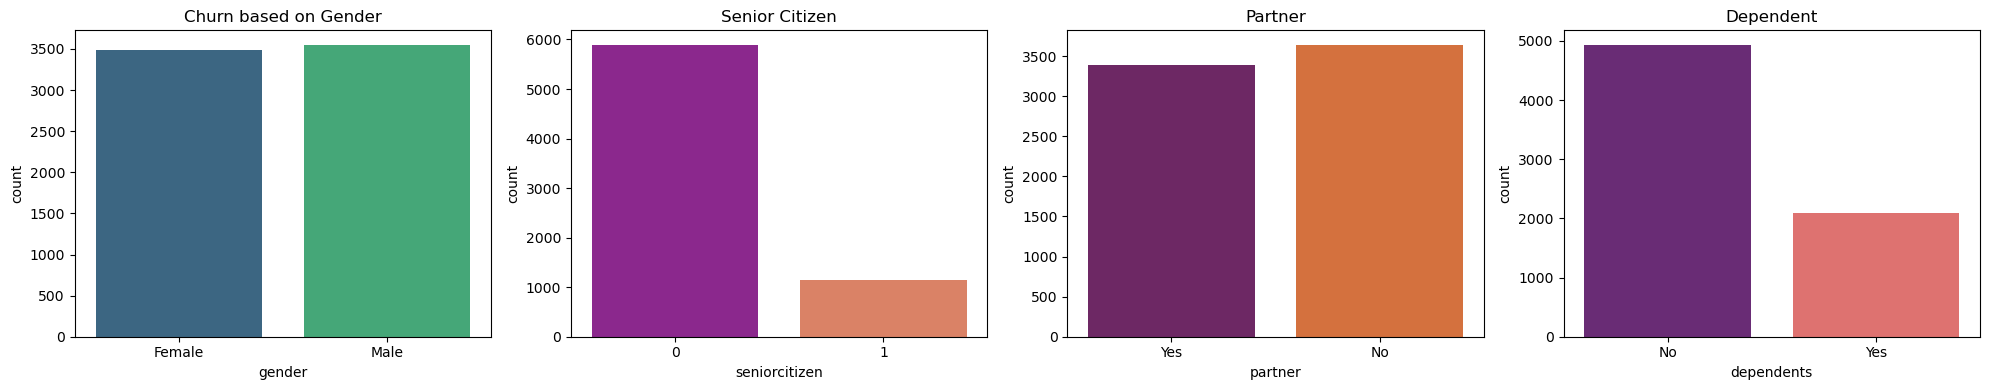

In [13]:
plt.figure(figsize=(20,4))


plt.subplot(1,4,1)
sns.countplot(x= data['gender'], data=data, palette='viridis')
plt.title("Gender")



plt.subplot(1,4,2)
sns.countplot(x=data['seniorcitizen'], data=data,palette='plasma')
plt.title("Senior Citizen")


plt.subplot(1,4,3)
sns.countplot(x=data['partner'], data=data,palette='inferno')
plt.title("Partner")

plt.subplot(1,4,4)
sns.countplot(x=data['dependents'], data=data,palette='magma')
plt.title("Dependent")

plt.tight_layout()

plt.show()

<Axes: xlabel='churn', ylabel='monthlycharges'>

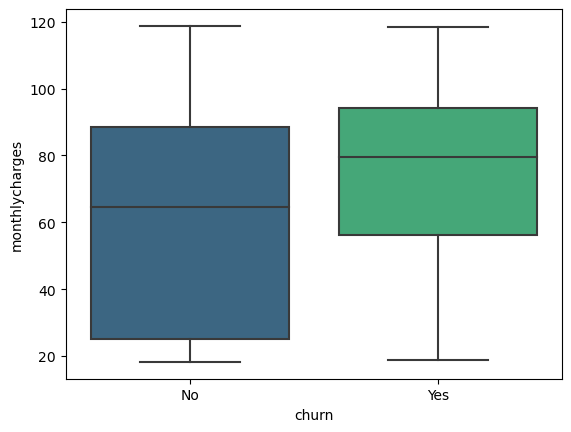

In [14]:
sns.boxplot(x='churn', y='monthlycharges', data=data, palette='viridis')

Inference:
- Most customers in the dataset are younger individuals without a dependent. 
- There is an equal distribution of user gender and marital status.
- Customers who churned have a higher median monthly charge than customers who renewed their subscription.

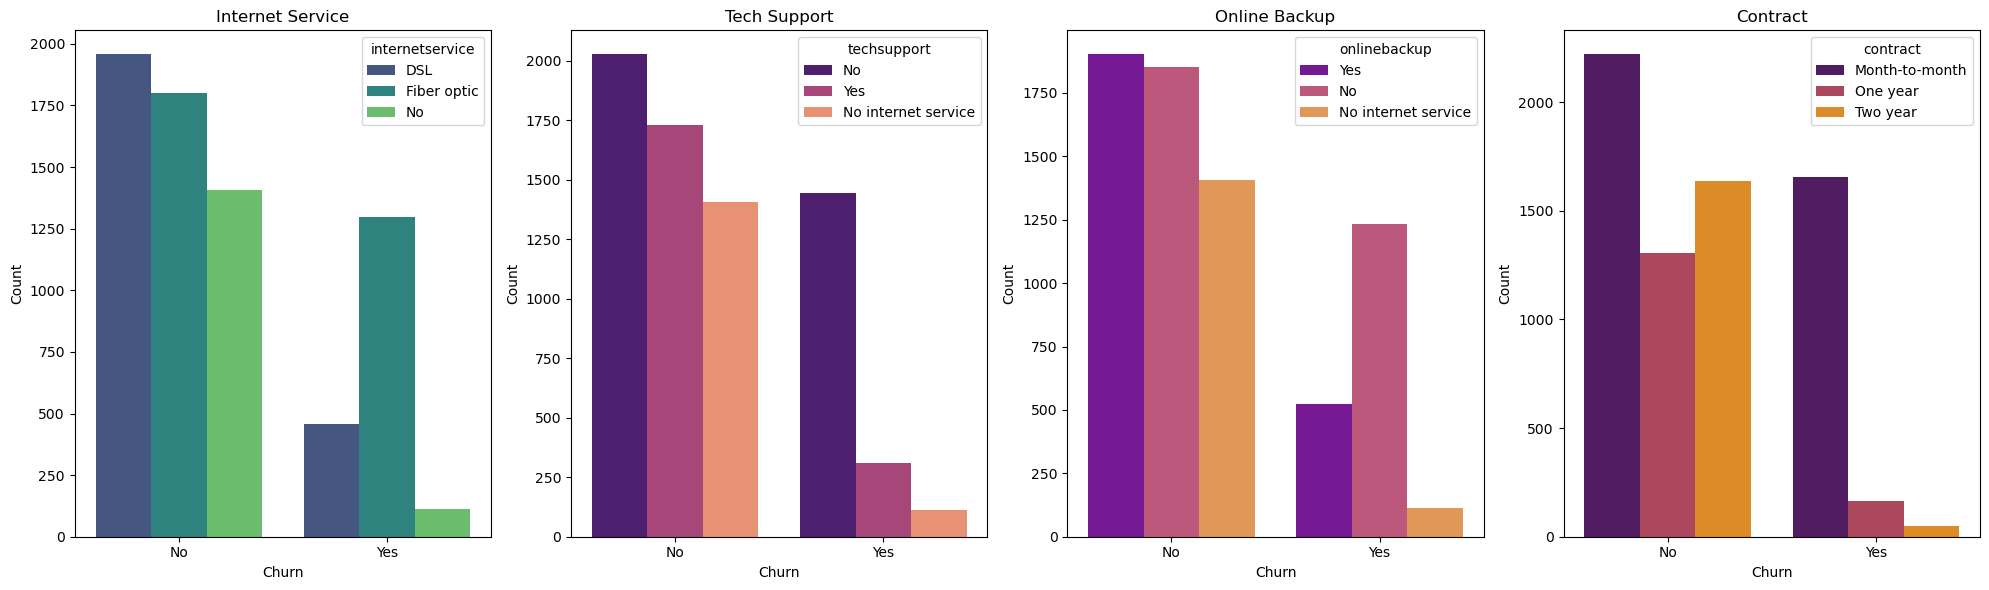

In [15]:
plt.figure(figsize=(20, 6))

# Subplot 1: Internet Service
plt.subplot(1, 4, 1)
sns.countplot(x='churn', hue='internetservice', data=data, palette='viridis')
plt.title('Internet Service')
plt.xlabel('Churn')
plt.ylabel('Count')

# Subplot 2: Tech Support
plt.subplot(1, 4, 2)
sns.countplot(x='churn', hue='techsupport', data=data, palette='magma')
plt.title('Tech Support')
plt.xlabel('Churn')
plt.ylabel('Count')

# Subplot 3: Online Backup
plt.subplot(1, 4, 3)
sns.countplot(x='churn', hue='onlinebackup', data=data, palette='plasma')
plt.title('Online Backup')
plt.xlabel('Churn')
plt.ylabel('Count')

# Subplot 4: Contract
plt.subplot(1, 4, 4)
sns.countplot(x='churn', hue='contract', data=data, palette='inferno')
plt.title('Contract')
plt.xlabel('Churn')
plt.ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


Inference:
- InternetService: It is clear from the visual above that customers who use fiber optic Internet churn more often than other users. This might be because fiber Internet is a more expensive service, or this provider doesn’t have good coverage.

- TechSupport: Many users who churned did not sign up for tech support. This might mean that these customers did not receive any guidance on fixing technical issues and decided to stop using the service. 

- OnlineBackup: Many customers who had churned did not sign up for an online backup service for data storage. 

- Contract: Users who churned were almost always on a monthly contract. This makes sense, since these customers pay for the service on a monthly basis and can easily cancel their subscription before the next payment cycle.

### Step 5: Encoding Categorical Variables

In [16]:
data.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [17]:
cat_features = data.drop(['customerid','totalcharges','monthlycharges','seniorcitizen','tenure'],axis=1)

cat_features.head()

,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [18]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data_cat = cat_features.apply(le.fit_transform)
data_cat.head()

,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [19]:
num_features = data[['customerid','totalcharges','monthlycharges','seniorcitizen','tenure']]
finaldf = pd.merge(num_features, data_cat, left_index=True, right_index=True)

In [20]:
finaldf.head()

,customerid,totalcharges,monthlycharges,seniorcitizen,tenure,gender,partner,dependents,phoneservice,multiplelines,...,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn
0,7590-VHVEG,29.85,29.85,0,1,0,1,0,0,1,...,0,2,0,0,0,0,0,1,2,0
1,5575-GNVDE,1889.50,56.95,0,34,1,0,0,1,0,...,2,0,2,0,0,0,1,0,3,0
2,3668-QPYBK,108.15,53.85,0,2,1,0,0,1,0,...,2,2,0,0,0,0,0,1,3,1
3,7795-CFOCW,1840.75,42.30,0,45,1,0,0,0,1,...,2,0,2,2,0,0,1,0,0,0
4,9237-HQITU,151.65,70.70,0,2,0,0,0,1,0,...,0,0,0,0,0,0,0,1,2,1


As mentioned above, the dataset is imbalanced, which means that a majority of values in the target variable belong to a single class. Most customers in the dataset did not churn - only 27% of them did.This class imbalance problem can lead to an underperforming machine learning model. Some algorithms that train on an imbalanced dataset always end up predicting the majority class. In our case, for instance, the model may predict that none of the customers churned. While a model like this will be highly accurate (in this case it will be correct 73% of the time), it is of no value to us since it is always predicting a single outcome.

There are a variety of techniques that can be used to overcome the class imbalance problem in machine learning. In this tutorial, we will use a technique called oversampling. This is a process that involves randomly selecting samples from the minority class and adding it to the training dataset. We are going to oversample the minority class until the number of data points are equal to that of the majority class.

Before we oversample, let’s do a train-test split. We will oversample solely on the training dataset, as the test dataset must be representative of the true population:

In [21]:
from sklearn.model_selection import train_test_split

finaldf = finaldf.dropna()
finaldf = finaldf.drop(['customerid'], axis=1)

X = finaldf.drop(['churn'], axis=1)
y = finaldf['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Now, let’s oversample the training dataset:

In [22]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote

In [23]:
#Let’s check the number of samples in each class to ensure that they are equal:
y_train.value_counts()

0    3452
1    3452
Name: churn, dtype: int64

### Step 6: Building the Customer Churn Prediction Model


In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=46)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=46)

### Step 7: Customer Churn Prediction Model Evaluation

In [25]:
from sklearn.metrics import accuracy_score

preds = rf.predict(X_test)
print(accuracy_score(preds,y_test))

0.7699267557087462


Our model is performing well, with an accuracy of approximately 0.78 on the test dataset.